In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


In [4]:
# Load Excel file
file_path = "FOIR Based Customer Analysis.xlsx"
excel = pd.ExcelFile(file_path)

# Check available sheets
excel.sheet_names

# Load the main sheet
df = pd.read_excel(file_path, sheet_name='AllSalesClosuredata')

# Display first few rows
df.head()


,LeadId,Project,masterLeadId,Lead Age (in Days),FinalvisitorId,Source,Born Date,Lead in Other Project (Number of Project),Lead in Other Project (Name of Project),RI/NRI,HOME,LOCATION,MEDIA,PRICE,SPECIFICATIONS,AMENITIES,Frequency,Inbound Call Count,Call Attempt,callDuration(secs),Inbound WA Count,Inbound WA Count.1,Salary,Salary Currency,Total Sales Value,Funding type,loanAmount,emi,loanPercentage,foirPercentage
0,371603,Spire,160867,57,NaN,Executive Referral,2025-01-12,2.0,"['Spectra', 'Springs']",RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,157.41,NaN,NaN,3400000.0,INR,18375221.5,LOAN,1.440180e+07,127270.0,80.000000,33.94
1,316061,Spire,125272,99,Visitor-6042177,Web Lead,2024-12-01,1.0,['Spectra'],RI,438.776000,65.314000,222.312,93.82,373.770000,158.941000,21.0,2.0,7.0,704.84,11.0,11.0,18434637.0,INR,19915736.0,LOAN,1.372700e+07,117328.0,70.380435,7.64
2,342558,Spire,37476,78,NaN,Lead Referral,2024-12-22,1.0,['Spectra'],RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.00,NaN,NaN,1900000.0,INR,20021736.0,LOAN,1.437132e+07,180111.0,73.285656,62.66
3,194805,Spire,153356,300,Visitor-3703780,Web Lead,2024-05-14,1.0,['Spectra'],RI,146.211583,28.151667,0.000,0.00,117.952583,57.084083,4.0,1.0,4.0,231.00,1.0,1.0,3500000.0,INR,18470471.5,LOAN,1.345464e+07,113370.0,74.345269,45.25
4,281944,Spire,215808,133,Visitor-5890499,aurum,2024-10-28,NaN,NaN,RI,58.074000,0.000000,0.000,0.00,0.000000,0.000000,1.0,2.0,9.0,36.30,1.0,1.0,1236000.0,INR,19915736.0,LOAN,1.117034e+07,90000.0,57.272067,32.77


In [6]:
# Shape and data types
print(df.shape)
df.info()

# Quick stats
df.describe(include='all').T


(2448, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LeadId                                     2448 non-null   int64  
 1   Project                                    2448 non-null   object 
 2   masterLeadId                               2448 non-null   int64  
 3   Lead Age (in Days)                         2448 non-null   int64  
 4   FinalvisitorId                             1477 non-null   object 
 5   Source                                     2448 non-null   object 
 6   Born Date                                  2448 non-null   object 
 7   Lead in Other Project (Number of Project)  1967 non-null   float64
 8   Lead in Other Project (Name of Project)    1967 non-null   object 
 9   RI/NRI                                     2448 non-null   object 
 10  HOME         

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LeadId,2448.0,NaN,NaN,NaN,96635.366422,91479.302119,49.0,22122.75,53570.5,154718.75,407629.0
Project,2448,5,Spectra,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
masterLeadId,2448.0,NaN,NaN,NaN,70157.004493,66507.947845,12.0,18441.75,38987.5,106859.0,311394.0
Lead Age (in Days),2448.0,NaN,NaN,NaN,842.919935,439.746394,31.0,455.75,1014.0,1215.0,1671.0
FinalvisitorId,1477,1382,Visitor-3083760,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,2448,28,Channel Partner,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Born Date,2448,919,2021-11-11,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead in Other Project (Number of Project),1967.0,NaN,NaN,NaN,1.609049,0.788511,1.0,1.0,1.0,2.0,4.0
Lead in Other Project (Name of Project),1967,44,['Spectra'],717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RI/NRI,2448,2,RI,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Convert date columns
df['Born Date'] = pd.to_datetime(df['Born Date'], errors='coerce')

# Handle missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing.head(10)

# Optionally fill missing values for numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(0)

# Clean text columns (e.g. remove spaces)
df['Funding type'] = df['Funding type'].str.strip().str.upper()


In [15]:
# ✅ Check the updated dataset after cleaning

# Show the shape (rows × columns)
print("Cleaned dataset shape:", df.shape)

# Show all column names
print("\nColumns in cleaned dataset:\n", df.columns.tolist())

# Display first few rows to verify cleaning results
df.head(10)   # Show first 10 rows


Cleaned dataset shape: (2448, 30)

Columns in cleaned dataset:
 ['LeadId', 'Project', 'masterLeadId', 'Lead Age (in Days)', 'FinalvisitorId', 'Source', 'Born Date', 'Lead in Other Project (Number of Project)', 'Lead in Other Project (Name of Project)', 'RI/NRI', 'HOME', 'LOCATION', 'MEDIA', 'PRICE', 'SPECIFICATIONS', 'AMENITIES', 'Frequency', 'Inbound Call Count', 'Call Attempt', 'callDuration(secs)', 'Inbound WA Count', 'Inbound WA Count.1', 'Salary', 'Salary Currency', 'Total Sales Value', 'Funding type', 'loanAmount', 'emi', 'loanPercentage', 'foirPercentage']


,LeadId,Project,masterLeadId,Lead Age (in Days),FinalvisitorId,Source,Born Date,Lead in Other Project (Number of Project),Lead in Other Project (Name of Project),RI/NRI,HOME,LOCATION,MEDIA,PRICE,SPECIFICATIONS,AMENITIES,Frequency,Inbound Call Count,Call Attempt,callDuration(secs),Inbound WA Count,Inbound WA Count.1,Salary,Salary Currency,Total Sales Value,Funding type,loanAmount,emi,loanPercentage,foirPercentage
0,371603,Spire,160867,57,NaN,Executive Referral,2025-01-12,2.0,"['Spectra', 'Springs']",RI,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,1.0,5.0,157.41,0.0,0.0,3400000.0,INR,18375221.5,LOAN,1.440180e+07,127270.0,80.000000,33.94
1,316061,Spire,125272,99,Visitor-6042177,Web Lead,2024-12-01,1.0,['Spectra'],RI,438.776000,65.314000,222.312,93.820,373.770000,158.941000,21.0,2.0,7.0,704.84,11.0,11.0,18434637.0,INR,19915736.0,LOAN,1.372700e+07,117328.0,70.380435,7.64
2,342558,Spire,37476,78,NaN,Lead Referral,2024-12-22,1.0,['Spectra'],RI,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,1.0,0.00,0.0,0.0,1900000.0,INR,20021736.0,LOAN,1.437132e+07,180111.0,73.285656,62.66
3,194805,Spire,153356,300,Visitor-3703780,Web Lead,2024-05-14,1.0,['Spectra'],RI,146.211583,28.151667,0.000,0.000,117.952583,57.084083,4.0,1.0,4.0,231.00,1.0,1.0,3500000.0,INR,18470471.5,LOAN,1.345464e+07,113370.0,74.345269,45.25
4,281944,Spire,215808,133,Visitor-5890499,aurum,2024-10-28,0.0,NaN,RI,58.074000,0.000000,0.000,0.000,0.000000,0.000000,1.0,2.0,9.0,36.30,1.0,1.0,1236000.0,INR,19915736.0,LOAN,1.117034e+07,90000.0,57.272067,32.77
5,241875,Spire,184906,176,NaN,Channel Partner,2024-09-15,0.0,NaN,RI,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,2.0,9.0,275.94,0.0,0.0,2000000.0,INR,19277616.0,LOAN,1.509270e+07,142398.0,80.000000,28.48
6,3011,Spire,2642,1383,Visitor-41422,Web Lead,2021-05-27,1.0,['Spectra'],RI,0.000000,0.000000,0.000,0.000,0.000000,0.000000,17.0,0.0,0.0,0.00,1.0,1.0,3000000.0,INR,9943691.5,SELF,7.656576e+06,67662.0,80.000000,0.00
7,249897,Spire,172072,171,NaN,Executive Referral,2024-09-20,1.0,['Spectra'],RI,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,10.0,1.0,198.23,0.0,0.0,9000000.0,INR,11647736.0,LOAN,8.988800e+06,120547.0,80.000000,16.03
8,24625,Spire,20771,1195,Visitor-2630650,Phone,2021-12-01,2.0,"['Springs', 'Spectra']",RI,36.029000,0.000000,0.000,144.139,0.000000,0.000000,2.0,1.0,13.0,378.00,0.0,0.0,1358772.0,INR,16755971.5,LOAN,1.310640e+07,104681.0,80.000000,350.14
9,256950,Spire,189944,165,NaN,Lead Referral,2024-09-26,2.0,"['Landmark', 'Spectra']",NRI,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,2.0,0.00,0.0,0.0,15200000.0,INR,17516066.5,LOAN,1.371448e+07,121196.0,80.000000,9.50


In [17]:
# Example: Calculate EMI-to-Salary ratio
df['EMI_to_Salary'] = np.where(df['emi'] > 0, df['emi'] / df['Salary'], 0)

# FOIR Category
def categorize_foir(x):
    if pd.isnull(x):
        return 'Unknown'
    elif x <= 40:
        return 'Low FOIR'
    else:
        return 'High FOIR'

df['FOIR_Category'] = df['foirPercentage'].apply(categorize_foir)


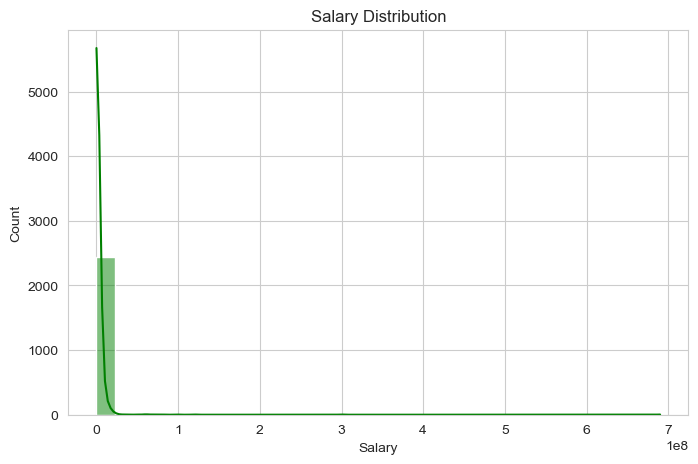

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=30, kde=True, color='green')
plt.title('Salary Distribution')
plt.show()


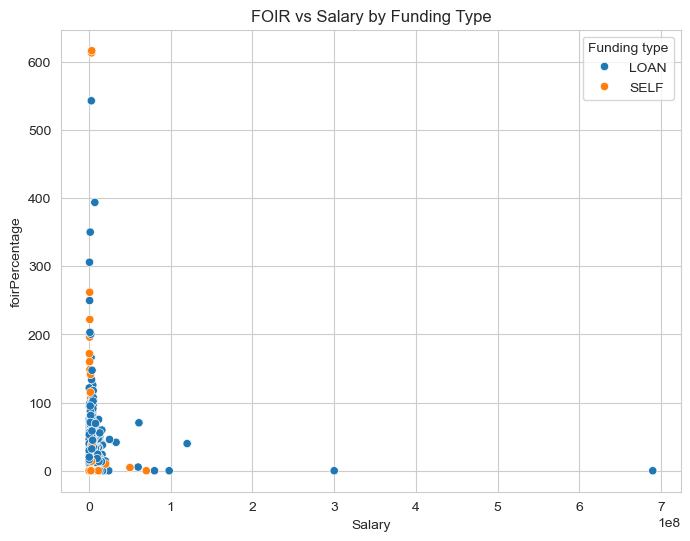

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Salary', y='foirPercentage', hue='Funding type')
plt.title('FOIR vs Salary by Funding Type')
plt.show()


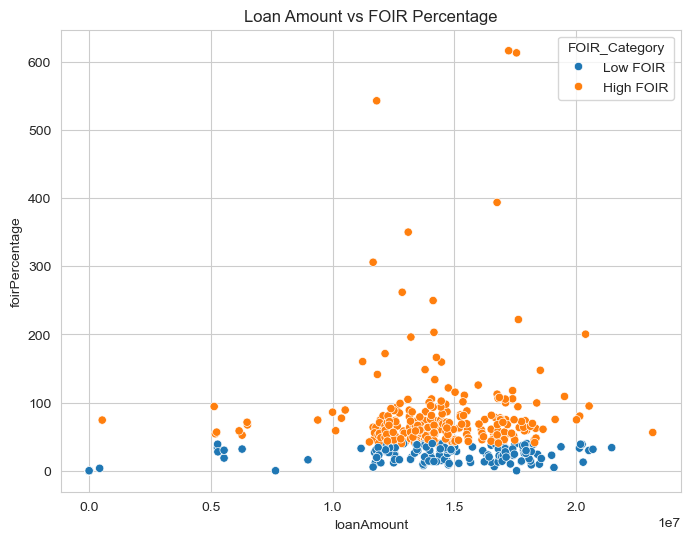

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='loanAmount', y='foirPercentage', hue='FOIR_Category')
plt.title('Loan Amount vs FOIR Percentage')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_19292\882185329.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FOIR_Category', palette='Set2')


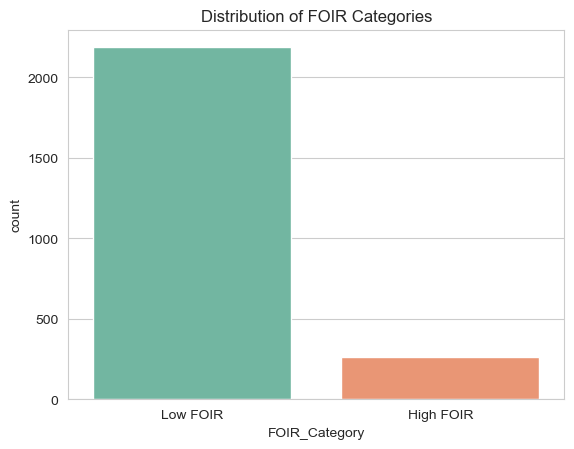

In [25]:
sns.countplot(data=df, x='FOIR_Category', palette='Set2')
plt.title('Distribution of FOIR Categories')
plt.show()


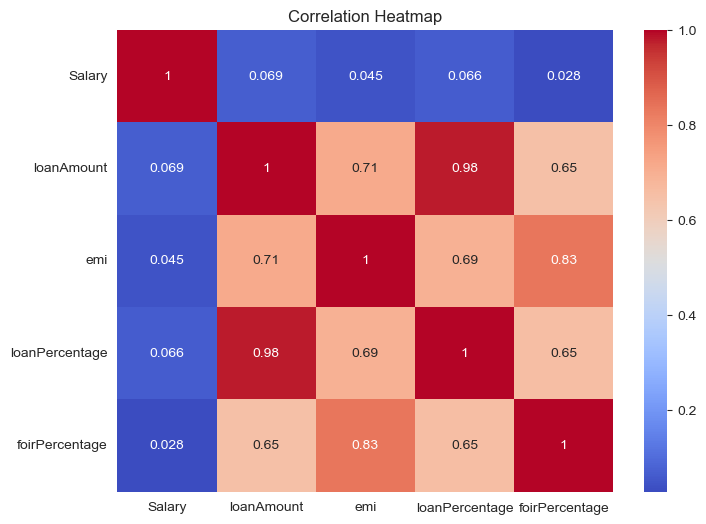

In [27]:
corr = df[['Salary', 'loanAmount', 'emi', 'loanPercentage', 'foirPercentage']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example: Predict FOIR category
model_data = df.dropna(subset=['foirPercentage'])
X = model_data[['Salary', 'loanAmount', 'emi']]
y = model_data['FOIR_Category']

# Convert target to binary
y = y.map({'Low FOIR': 0, 'High FOIR': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       653
           1       0.73      0.65      0.68        82

    accuracy                           0.93       735
   macro avg       0.84      0.81      0.82       735
weighted avg       0.93      0.93      0.93       735

